<a href="https://colab.research.google.com/github/MykolaRobot/ML_homework_3/blob/master/ML_homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

**Data Preparation**

In [0]:
url="https://raw.githubusercontent.com/yehorchankov/udata-school/master/hw_3_data.csv"
df=pd.read_csv(url)

In [9]:
# get shape of data
df.shape

(40000, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
f0     40000 non-null float64
f1     40000 non-null float64
f2     40000 non-null float64
f3     40000 non-null float64
f4     40000 non-null float64
f5     40000 non-null float64
f6     40000 non-null float64
f7     40000 non-null float64
f8     40000 non-null float64
f9     40000 non-null float64
lbl    40000 non-null float64
dtypes: float64(11)
memory usage: 3.4 MB


In [11]:
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,lbl
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,-0.002991,0.003209,-0.002991,-0.009630,-0.002443,-0.006919,0.008981,-0.002443,0.012763,0.005384,1.499500
std,0.555049,0.669027,0.555049,1.473199,0.792873,1.000283,1.320918,0.792873,1.453225,1.324047,1.117668
min,-1.905599,-3.160811,-1.905599,-5.414462,-3.210632,-3.933070,-6.372736,-3.210632,-4.788817,-4.911375,0.000000
25%,-0.349748,-0.555245,-0.349748,-1.062237,-0.556013,-0.688123,-1.007493,-0.556013,-1.036148,-1.024616,1.000000
50%,-0.073417,0.037319,-0.073417,0.075740,0.081158,-0.009233,0.009509,0.081158,0.053543,0.036987,1.000000
75%,0.424013,0.531874,0.424013,1.045986,0.494282,0.671744,1.041563,0.494282,1.071657,1.014510,2.000000
max,2.782764,2.263375,2.782764,5.027650,2.735036,4.492202,4.276321,2.735036,5.395193,5.353837,3.000000


In [15]:
# understand how many classe we have
df.lbl.value_counts()

1.0    10009
2.0    10008
0.0     9998
3.0     9985
Name: lbl, dtype: int64

Дані збалансовані, можна використовувати метрику accuracy

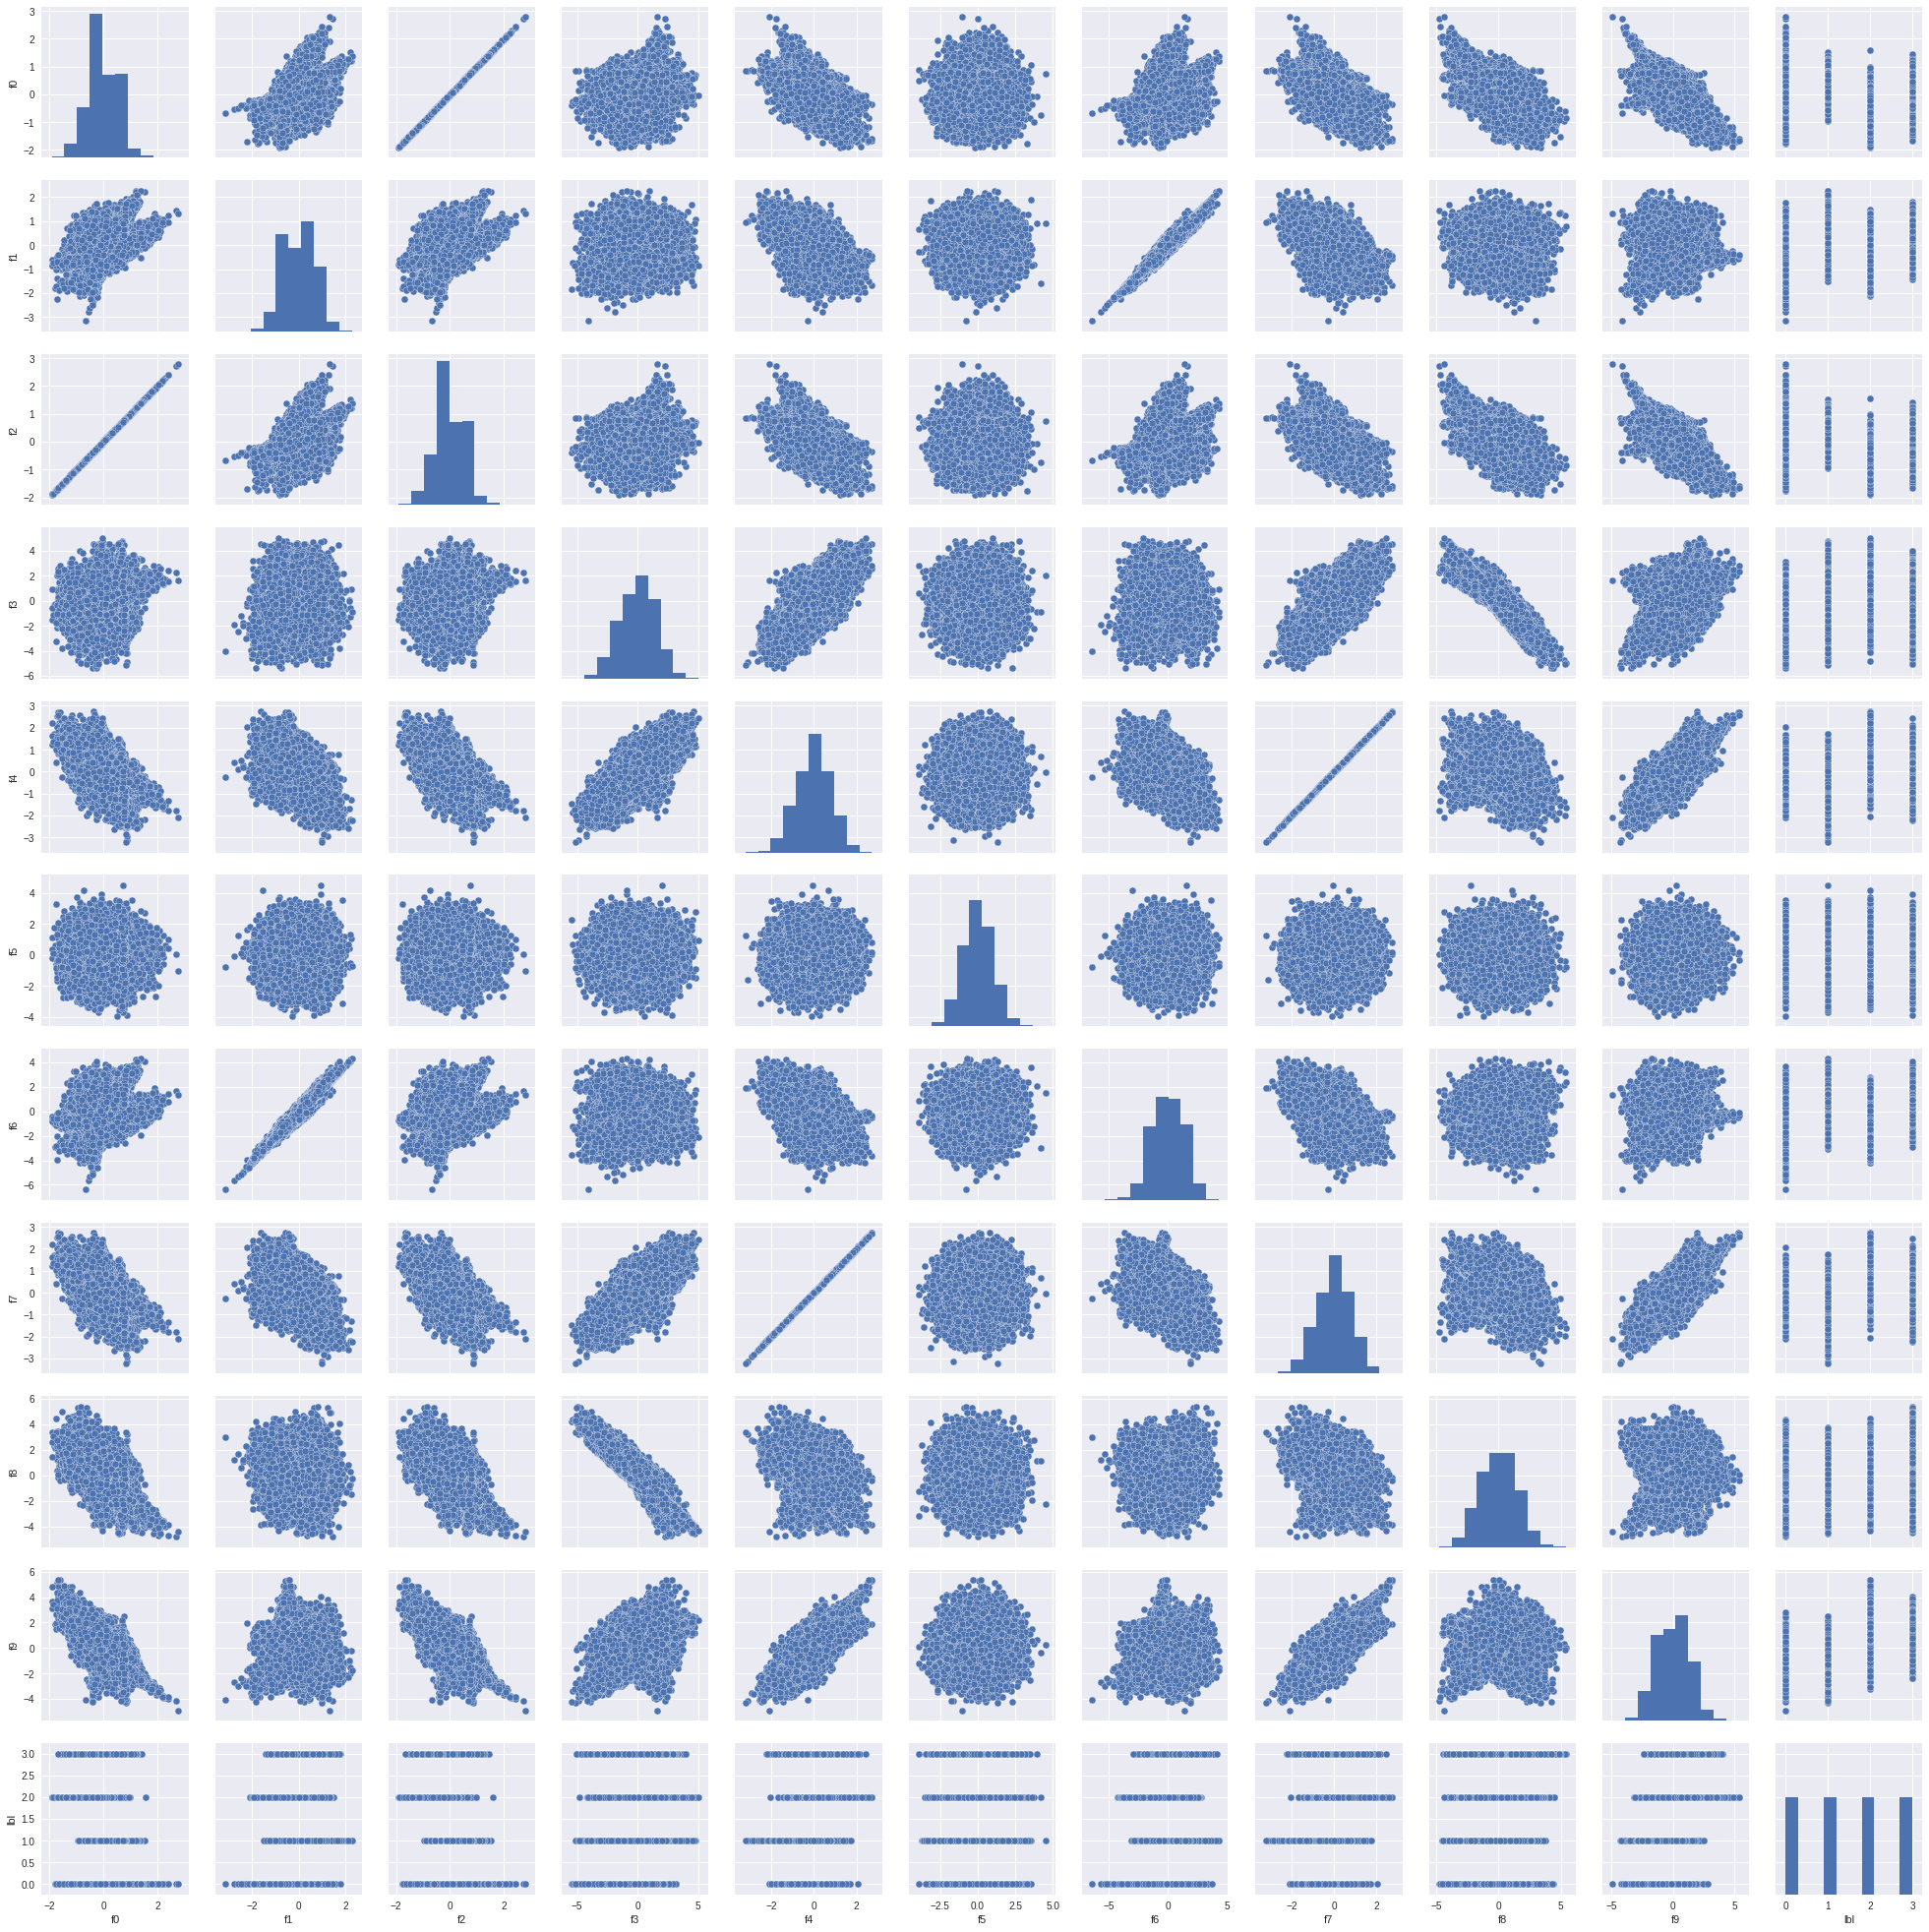

In [19]:
# Explore correlation - strong positive correlation between (f0,f2) ,(f1,f7), (f2,f6), (f7,f4)/ 
# Negative correlation (f8,f3)
# almost al features has +- normal distribution
sb.pairplot(df)
plt.show()

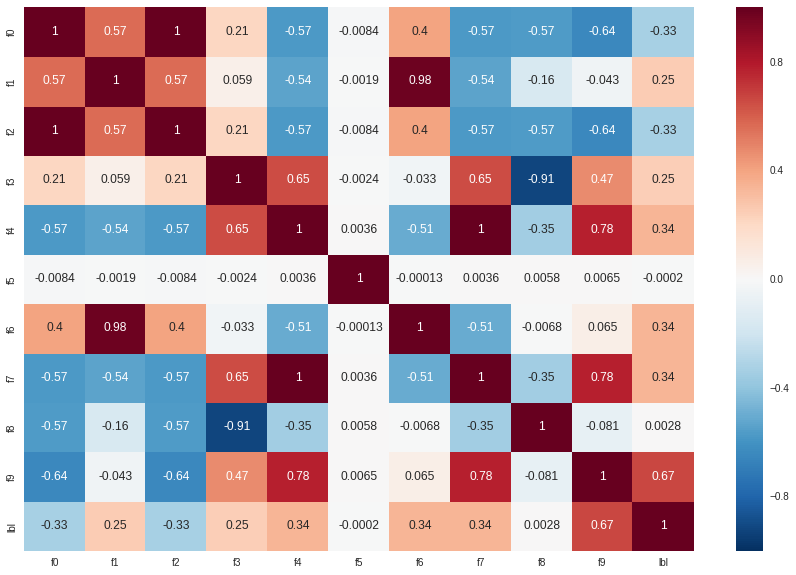

In [20]:
# let's calculate correlation for all features as heatmap
plt.figure(figsize=(15, 10))
sb.heatmap(df.corr(), annot=True)
plt.show()

Outliers detection and cleaning

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


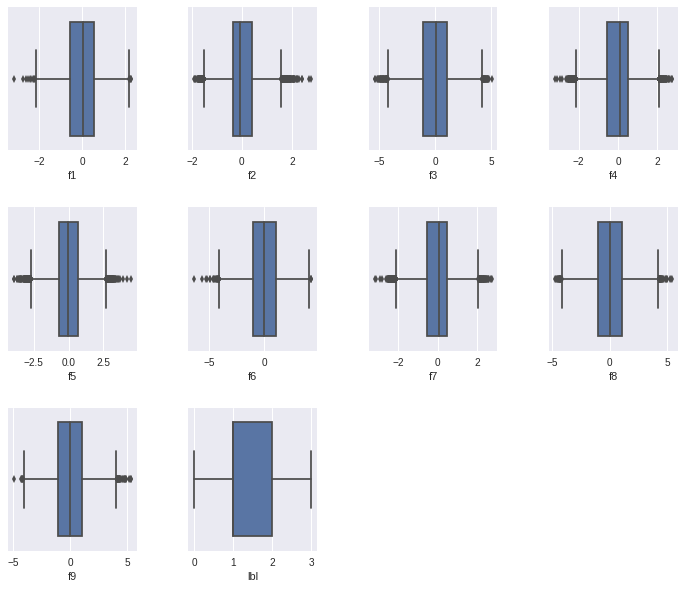

In [23]:
# plot our features as boxplot
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
columns=df.columns
for i in range(1, 11):
    ax = fig.add_subplot(3, 4, i)
    sb.boxplot(x=df[columns[i]])
plt.show()

We see some outliers, let's fix them

In [24]:
# remove them based on z-score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
df_ = df[(z < 3).all(axis=1)]
print(df.shape[0] - df_.shape[0])

444


We remove 444 outliers

In [25]:
# check how classes are distributed now
df_.lbl.value_counts()

3.0    9933
1.0    9922
2.0    9889
0.0    9812
Name: lbl, dtype: int64

**Classification**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [0]:
# feature data X
X = df_.values[:,:-1]
# target variable y
y = df_.values[:,-1]

In [0]:
# scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [0]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=42)

In [0]:
from sklearn.svm import SVC

In [0]:
svm_linear=SVC()
forest=RandomForestClassifier()
zoo=dict({'SVM ':svm_linear,'Random Forest':forest})

In [42]:
model_scores=dict()
for name,model in zoo.items():
  scores=cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')
  model_scores[name]=scores.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

In [43]:
for name,score in model_scores.items():
  print(f"Accuracy for {name} : {score}")

Accuracy for SVM Linear : 0.866080270255001
Accuracy for Random Forest : 0.8760918193980676


Tune models to choose best hyperparameters

In [0]:
# use greed search
forest_params = {'n_estimators' : [50, 100, 200,300], 'max_depth' : [3, 5, 10]}
svm_params = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'C' : [1,5,0.5,0.1]}


In [0]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
svm_gs = GridSearchCV(svm, svm_params, cv = 4)
svm_gs.fit(X_train, y_train)
print(svm_gs.best_params_)

In [0]:
forest = RandomForestClassifier()
forest_gs = GridSearchCV(forest, forest_params, cv = 4)
forest_gs.fit(X_train, y_train)
print(forest_gs.best_params_)

In order to get hyperparameters we need much time, but deadline is soon(. But the idea is correct;)

**Clasterization**

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sil
from sklearn.metrics import completeness_score as com
from sklearn.cluster import DBSCAN

In [0]:
# first, use k-means algorithm
features = df.iloc[:, :-1]
label = df.iloc[:, -1]

In [0]:
k_means_labels = KMeans(n_clusters=4*2).fit_predict(data)

In [54]:
metric1 = com(labels_true=label, labels_pred=k_means_labels)
metric2 = sil(X=features, labels=k_means_labels, sample_size=450)
print(f'Complet score is: {metric1},Silh score is {metric2}')


Complet score is: 0.43422187657258027,Silh score is 0.19829219216037178


In [0]:
# DBSCAN, parameters choose randomly
dbscan = DBSCAN(eps=0.6, min_samples=10).fit(data)

In [59]:
metric1 = com(labels_true=label, labels_pred=dbscan.labels_)
metric2 = sil(X=features, labels=dbscan.labels_, sample_size=600)
print(f'Complet score is: {metric1},Silh score is {metric2}')

Complet score is: 0.7728212359132468,Silh score is -0.03434221066299436
